In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/steamspy_appdetails.csv')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81393 entries, 0 to 81392
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            81393 non-null  int64  
 1   name             81380 non-null  object 
 2   developer        81149 non-null  object 
 3   publisher        80883 non-null  object 
 4   score_rank       45 non-null     float64
 5   positive         81393 non-null  int64  
 6   negative         81393 non-null  int64  
 7   userscore        81393 non-null  int64  
 8   owners           81393 non-null  object 
 9   average_forever  81393 non-null  int64  
 10  average_2weeks   81393 non-null  int64  
 11  median_forever   81393 non-null  int64  
 12  median_2weeks    81393 non-null  int64  
 13  price            81383 non-null  float64
 14  initialprice     81385 non-null  float64
 15  discount         81385 non-null  float64
 16  ccu              81393 non-null  int64  
 17  languages   

In [4]:
df.select_dtypes(include=[np.number]).describe().T


,count,mean,std,min,25%,50%,75%,max
appid,81393.0,1.535301e+06,909663.390466,10.0,779640.0,1385960.0,2222160.0,3744990.0
score_rank,45.0,9.920000e+01,0.660578,98.0,99.0,99.0,100.0,100.0
positive,81393.0,1.557345e+03,33661.405597,0.0,5.0,18.0,99.0,7642084.0
negative,81393.0,2.557281e+02,6386.154976,0.0,1.0,5.0,27.0,1173003.0
userscore,81393.0,4.205521e-02,1.834196,0.0,0.0,0.0,0.0,100.0
average_forever,81393.0,2.563580e+02,5708.227545,0.0,0.0,0.0,38.0,1272173.0
average_2weeks,81393.0,1.500380e+01,186.364330,0.0,0.0,0.0,0.0,17753.0
median_forever,81393.0,2.069733e+02,6494.668183,0.0,0.0,0.0,36.0,1272173.0
median_2weeks,81393.0,1.568126e+01,204.253616,0.0,0.0,0.0,0.0,17753.0
price,81383.0,7.631271e+02,1318.200468,0.0,119.0,499.0,999.0,99998.0


We noticed a few problematic columns: Score rank is mostly null values, Metacritic score and User score is mostly 0 values, and all price related data is in cents not dollars

In [5]:
df.select_dtypes(include=[object]).describe().T


,count,unique,top,freq
name,81380,80803,The House,5
developer,81149,51569,Choice of Games,155
publisher,80883,45431,BFG Entertainment,472
owners,81393,13,"0 .. 20,000",55527
languages,81274,14759,English,39264
genre,81144,2405,"Action, Indie",4656
tags,81393,75091,"Adventure,Casual,Hidden Object",262


In [6]:
df.isnull().sum()


appid                  0
name                  13
developer            244
publisher            510
score_rank         81348
positive               0
negative               0
userscore              0
owners                 0
average_forever        0
average_2weeks         0
median_forever         0
median_2weeks          0
price                 10
initialprice           8
discount               8
ccu                    0
languages            119
genre                249
tags                   0
dtype: int64

In [7]:
rows_with_missing_values = df[df['price'].isnull()]

print(rows_with_missing_values)

        appid                                 name developer publisher  \
36756  530940  BIOHAZARD 7 resident evil グロテスクVer.       NaN       NaN   
38346  657860             Dragon's Prophet Turkiye       NaN       NaN   
40427  846260              Murderous Pursuits Beta       NaN       NaN   
43402  684740                      Dungeons 3 Beta       NaN       NaN   
67853  817520                           烹饪吧！地狱土豆？！       NaN       NaN   
67862  944060           魔法洞穴２ The Enchanted Cave 2       NaN       NaN   
67865  943490                   Team Fortress 2008       NaN       NaN   
67922  391920                      Ether One Redux       NaN       NaN   
67931  737230     Rising Storm 2: Vietnam CTB Beta       NaN       NaN   
67939  396740               Blood Bowl 2 - Preview       NaN       NaN   

       score_rank  positive  negative  userscore       owners  \
36756         NaN         0         0          0  0 .. 20,000   
38346         NaN         0         0          0  0 .. 

Most rows with missing values look like valid entries.

In [8]:
rows_with_missing_values = df[df['name']=='Removed']
print(rows_with_missing_values)

       appid     name developer publisher  score_rank  positive  negative  \
3979  783140  Removed       NaN       NaN         NaN        25        15   

      userscore              owners  average_forever  average_2weeks  \
3979          0  200,000 .. 500,000              123               0   

      median_forever  median_2weeks  price  initialprice  discount  ccu  \
3979              59              0    0.0           0.0       0.0    0   

     languages                      genre                     tags  
3979       NaN  Action, Indie, Simulation  Simulation,Action,Indie  


Check for removed games that are in the dataset

In [9]:
#outlier detection
print(df.nlargest(10, 'price'))
print(df.nlargest(10, 'positive'))
print(df.nlargest(10, 'negative'))
print(df.nlargest(10, 'average_forever'))
print(df.nlargest(10, 'median_forever'))



         appid                               name            developer  \
76123  2499620                  The Leverage Game             A&S Inc.   
67215  1200520  Ascent Free-Roaming VR Experience              Fury VR   
39896  3013840                          True Love                A Guy   
41617  2936160                       Pyramid Game         Pyramid Game   
80574  1105450              Aartform Curvy 3D 4.0         Aartform Ltd   
62234   253670              Aartform Curvy 3D 3.0             Aartform   
53457   502570                      Houdini Indie               SideFX   
41752   438450      3DF Zephyr Lite Steam Edition           3Dflow SRL   
70776  2070990        VEGAS Edit 20 Steam Edition  MAGIX Software GmbH   
14579  1419440                        Truck Truck                 Hede   

                 publisher  score_rank  positive  negative  userscore  \
76123             A&S Inc.         NaN         1         0          0   
67215  Zenland Video Games         NaN 

In [10]:
#Dropping unnecessary columns
df = df.drop(columns=['score_rank', 'userscore', 'discount', 'ccu', 'average_2weeks', 'median_2weeks'])

#Fill missing values
fillna_columns = ['publisher', 'developer', 'genre', 'languages', 'name']
for col in fillna_columns:
    df[col] = df[col].fillna('null')

#Drop removed game
df = df[df['appid'] != 3979]
df = df.dropna(subset=['price'])

#Convert price from cents to dollars
df['price'] = df['price']*0.01
df['initialprice'] = df['initialprice']*0.01

In [11]:
df = df[df['owners'] != '0 .. 20,000'] #Drop non-commercial games
print(df['owners'].value_counts())


owners
20,000 .. 50,000              10987
50,000 .. 100,000              5553
100,000 .. 200,000             3616
200,000 .. 500,000             3013
500,000 .. 1,000,000           1247
1,000,000 .. 2,000,000          787
2,000,000 .. 5,000,000          432
5,000,000 .. 10,000,000         134
10,000,000 .. 20,000,000         53
20,000,000 .. 50,000,000         32
50,000,000 .. 100,000,000         9
100,000,000 .. 200,000,000        3
Name: count, dtype: int64


In [12]:
#Format tags, genres, languages columns from comma-separated strings to lists
import re

df['tags'] = df['tags'].str.split(',')
df['genre'] = df['genre'].str.split(',')
df['languages'] = df['languages'].str.split(',')


def clean_feature_names(df):
    df_clean = df.copy()   
    def clean_name(name):
        if not isinstance(name, str):
            name = str(name)
        name = re.sub(r'[\[\]<>,\'":;]', '', name)  # Remove [, ], <, >, etc.)
        if name and name[0].isdigit():
            name = 'feat_' + name
        return name
    df_clean.columns = [clean_name(col) for col in df_clean.columns]
    return df_clean

df = clean_feature_names(df)

print( df['tags'].head(3))

0    [FPS, Shooter, Multiplayer, Competitive, Actio...
1    [Free to Play, Battle Royale, Multiplayer, FPS...
2    [Survival, Shooter, Battle Royale, Multiplayer...
Name: tags, dtype: object


In [13]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 25866 entries, 0 to 25865
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            25866 non-null  int64  
 1   name             25866 non-null  object 
 2   developer        25866 non-null  object 
 3   publisher        25866 non-null  object 
 4   positive         25866 non-null  int64  
 5   negative         25866 non-null  int64  
 6   owners           25866 non-null  object 
 7   average_forever  25866 non-null  int64  
 8   median_forever   25866 non-null  int64  
 9   price            25866 non-null  float64
 10  initialprice     25866 non-null  float64
 11  languages        25866 non-null  object 
 12  genre            25866 non-null  object 
 13  tags             25866 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 3.0+ MB


appid              0
name               0
developer          0
publisher          0
positive           0
negative           0
owners             0
average_forever    0
median_forever     0
price              0
initialprice       0
languages          0
genre              0
tags               0
dtype: int64

Data cleaning step done. Now building target variable based on Steam's definition of "Mostly Positive" reviewed games

In [14]:
# Build target variable- indie success
df['positive_rate'] = df['positive'] / (df['positive'] + df['negative'] + 1)
df['target'] = ((df['positive']+ df['negative'] >= 10) #at least 10 reviews
                &(df['positive_rate'] >= 0.7)  #positively reviewed
                ).astype(int) 
df['target'].value_counts()

target
1    16103
0     9763
Name: count, dtype: int64

EDA Step
- Correlation between numeric features and positive rate (price, initialprice, average_forever, median_forever)
- Distribution of multi-categorical features and average positive rate (genre, languages, tags)

In [15]:
# Explore unique tags
unique_tags = set() #sets do not allow duplicates
for tags in df['tags']:
    for tag in tags:
        unique_tags.add(tag)
print(f"Unique tags ({len(unique_tags)})")

Unique tags (450)


Correlation with Positive Rate:
positive_rate      1.000000
initialprice       0.173108
price              0.160871
positive           0.059249
average_forever    0.022318
negative           0.008955
median_forever     0.002500
Name: positive_rate, dtype: float64
Correlation with Positive reviews:
positive           1.000000
negative           0.807356
initialprice       0.077920
price              0.076362
average_forever    0.072525
positive_rate      0.059249
median_forever     0.010604
Name: positive, dtype: float64


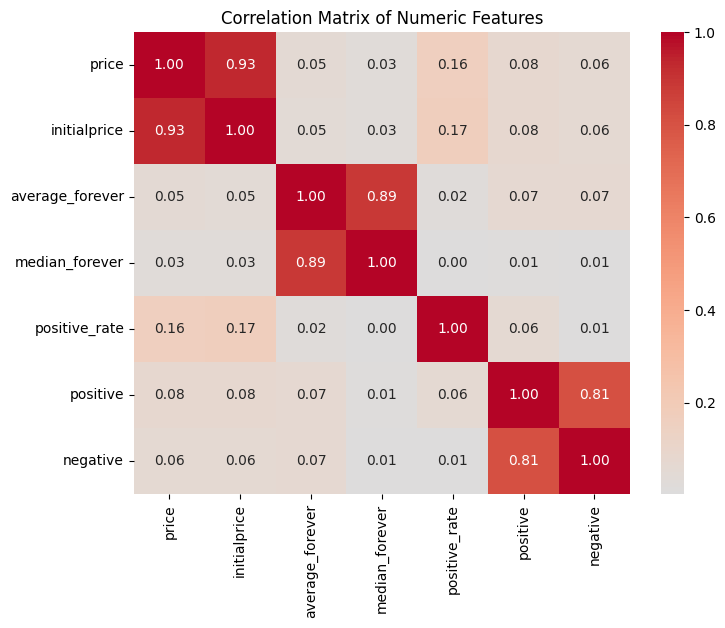

In [16]:
#numerical correlation with positive rate
# Select numeric features
numeric_features = ['price', 'initialprice', 'average_forever', 'median_forever', 'positive_rate', 'positive', 'negative']

# Correlation matrix
corr_matrix = df[numeric_features].corr()
print("Correlation with Positive Rate:")
print(corr_matrix['positive_rate'].sort_values(ascending=False))

print("Correlation with Positive reviews:")
print(corr_matrix['positive'].sort_values(ascending=False))

# Visualize

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [17]:
mean_rate = df['positive_rate'].mean()

#Mean positive rate for games with specific tags/languages
mean_rate_soundtrack = df[df['tags'].apply(lambda tags: 'Great Soundtrack' in tags)]['positive_rate'].mean()
mean_rate_MOBA = df[df['tags'].apply(lambda tags: 'MOBA' in tags)]['positive_rate'].mean()

mean_rate_Japanese = df[df['languages'].apply(lambda languages: 'Japanese' in languages)]['positive_rate'].mean()
mean_rate_English = df[df['languages'].apply(lambda languages: 'English' in languages)]['positive_rate'].mean()


print("Mean positive rate:", mean_rate)
print("Mean positive rate for games with great soundtrack:",mean_rate_soundtrack)
print("Mean positive rate for MOBA games:", mean_rate_MOBA)
print("Mean positive rate for games in Japanese:", mean_rate_Japanese)
print("Mean positive rate for games in English:",mean_rate_English)

Mean positive rate: 0.7369866038516552
Mean positive rate for games with great soundtrack: 0.8300417755276038
Mean positive rate for MOBA games: 0.63861447896064
Mean positive rate for games in Japanese: 0.8015098471531983
Mean positive rate for games in English: 0.7358316925342094


Findings: Numerical features like initial price can correlate with positive rate, and mean positive rate can vary significantly for games with different tags, genres, and supported languages. We should be able to cook up a model that predicts the classfication of game ratings based on these features. 

Pre-processing features with scaling and encoding

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean',  fill_value=np.nan)
df[['price']] = imputer.fit_transform(df[['price']])

# Log-transform skewed numerical features
df['average_forever'] = np.log1p(df['average_forever'])
df['median_forever'] = np.log1p(df['median_forever'])
df['price']= np.log1p(df['price'])
df['initialprice']= np.log1p(df['initialprice'])  #add 1 to avoid log(0)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer

X_train, X_test, y_train, y_test = train_test_split(
    df[['price', 'initialprice', 'genre', 'languages', 'tags']], # Original features
    df['target'],
    test_size=0.2,
    random_state=42,
)
    
numeric_features = ['price', 'initialprice']
categorical_features = ['genre', 'languages', 'tags']

#Scaling numeric features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

X_train_num = pd.DataFrame(X_train[numeric_features])
X_test_num = pd.DataFrame(X_test[numeric_features])

X_train_cat = []
X_test_cat = []

#Encoding categorical features
for feature in categorical_features:
    mlb = MultiLabelBinarizer()
    train_binarized  = mlb.fit_transform(X_train[feature])
    test_binarized = mlb.transform(X_test[feature])
    col_names = [f"{feature}_{cat}" for cat in mlb.classes_]
    X_train_cat.append(pd.DataFrame(train_binarized, columns=col_names, index=X_train.index))
    X_test_cat.append(pd.DataFrame(test_binarized, columns=col_names, index=X_test.index))

X_train_final = pd.concat([X_train_num] + X_train_cat, axis=1)
X_test_final = pd.concat([X_test_num] + X_test_cat, axis=1)



/home/haoli/desktop/coding/steam/steam_success_predictor/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:1007: UserWarning: unknown class(es) [' Scots', ' Traditional Chinese (text only)', 'Hebrew', 'Romanian', 'Slovak'] will be ignored
  warnings.warn(


Now let's try a few models (Logistic Regression, RandomForest, XGBoost) and evaluate their performance

In [20]:
from sklearn.metrics import precision_score, roc_auc_score, recall_score, f1_score, accuracy_score

def print_metrics(model_name, predictions, true_labels):
    print(f"\n--- {model_name} Performance ---")
    print(f"Precision: {precision_score(true_labels, predictions):.4f}")
    print(f"Recall:    {recall_score(true_labels, predictions):.4f}")
    print(f"F1-Score:  {f1_score(true_labels, predictions):.4f}")
    print(f"Accuracy:  {accuracy_score(true_labels, predictions):.4f}")
    print(f"ROC-AUC:   {roc_auc_score(true_labels, predictions):.4f}")

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', random_state=42)
logreg.fit(X_train_final, y_train)
y_pred = logreg.predict(X_test_final)

print_metrics("Logistic regression", y_pred, y_test)


--- Logistic regression Performance ---
Precision: 0.8039
Recall:    0.6889
F1-Score:  0.7420
Accuracy:  0.7002
ROC-AUC:   0.7040


/home/haoli/desktop/coding/steam/steam_success_predictor/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_final, y_train)
rf_predictions = rf_model.predict(X_test_final)

print_metrics("Random Forest", rf_predictions, y_test)


--- Random Forest Performance ---
Precision: 0.7420
Recall:    0.8616
F1-Score:  0.7973
Accuracy:  0.7259
ROC-AUC:   0.6804


In [23]:
from xgboost import XGBClassifier

# Convert to numpy arrays (XGBoost doesn't need column names)
X_train_array = X_train_final.values
X_test_array = X_test_final.values

xgb_param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [4, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.9]
}

xgb_base = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
xgb_search = GridSearchCV(xgb_base, xgb_param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
xgb_search.fit(X_train_array, y_train)

print(f"Best XGBoost Params: {xgb_search.best_params_}")

# Use the best estimator for final prediction
best_xgb = xgb_search.best_estimator_



xgb_tuned_preds = best_xgb.predict(X_test_array)

print_metrics("XGBoost (Tuned)", xgb_tuned_preds, y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/haoli/desktop/coding/steam/steam_success_predictor/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [17:01:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/haoli/desktop/coding/steam/steam_success_predictor/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [17:01:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/haoli/desktop/coding/steam/steam_success_predictor/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [17:01:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/haoli/desktop/coding/steam/steam_success_predictor/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [17:01:14] WARNING: /workspace/src/learner.

Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300, 'subsample': 0.7}

--- XGBoost (Tuned) Performance ---
Precision: 0.7628
Recall:    0.8313
F1-Score:  0.7956
Accuracy:  0.7327
ROC-AUC:   0.6996


[[1100  837]
 [ 546 2691]]


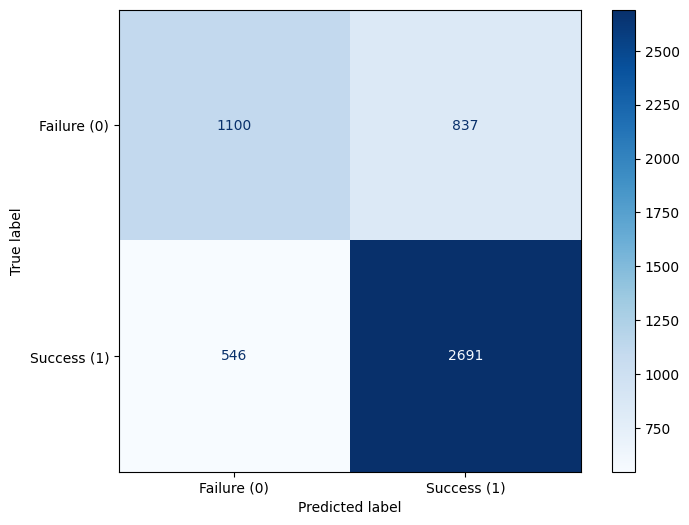

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, xgb_tuned_preds, labels=[0, 1])  # Specify class order

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Failure (0)', 'Success (1)']  # Customize labels
)
disp.plot(cmap='Blues', ax=ax, values_format='d')  # 'd' for integer format
print(cm)

The best performance metrics we achieved is high recall: meaning it catches more than 80% of the games that are well-rated

In [34]:
# Get feature importances
importances = best_xgb.feature_importances_

# Create feature names (adjust based on your actual features)

# Create a DataFrame
importance_df = pd.DataFrame({
    'feature': X_train_final.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

print("Top 20 Most Important Features:")
print(importance_df.head(50))

print("\nBottom 10 Features:")
print(importance_df.tail(50))

print(f"\nTotal features: {len(importance_df)}")
print(f"Average importance: {importance_df['importance'].mean():.5f}")

Top 20 Most Important Features:
                            feature  importance
340           tags_Great Soundtrack    0.015894
243                    tags_Classic    0.007218
1                      initialprice    0.006690
348                     tags_Hentai    0.006327
394      tags_Massively Multiplayer    0.005760
327               tags_Free to Play    0.005314
504             tags_Sexual Content    0.005035
95              languages_ Japanese    0.004874
409                   tags_Moddable    0.004784
282                  tags_Difficult    0.004705
234                       tags_Cats    0.004401
268                       tags_Cute    0.004266
593               tags_Visual Novel    0.004161
16     genre_ Massively Multiplayer    0.004024
493                    tags_Romance    0.003999
508                      tags_Short    0.003824
457              tags_Political Sim    0.003782
328                      tags_Funny    0.003762
301                  tags_Emotional    0.003723
111  lan

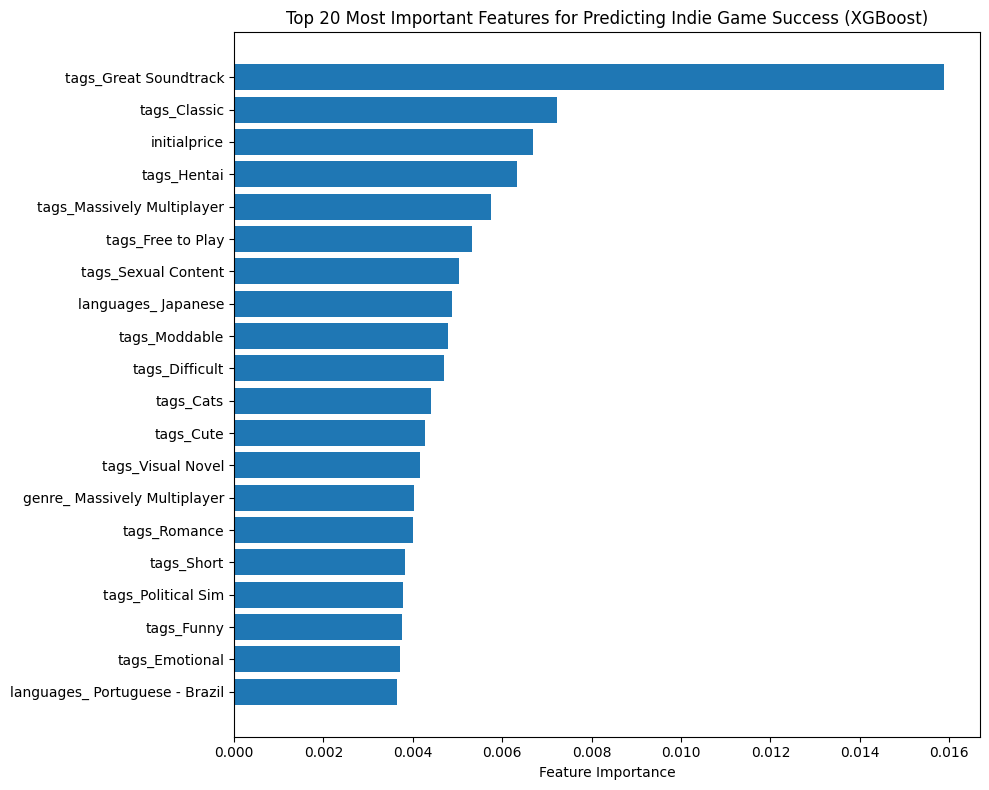

In [26]:
import matplotlib.pyplot as plt

# Plot top 20 features
top_n = 20
plt.figure(figsize=(10, 8))
plt.barh(range(top_n), importance_df['importance'].head(top_n)[::-1])
plt.yticks(range(top_n), importance_df['feature'].head(top_n)[::-1])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features for Predicting Indie Game Success (XGBoost)')
plt.tight_layout()
plt.show()

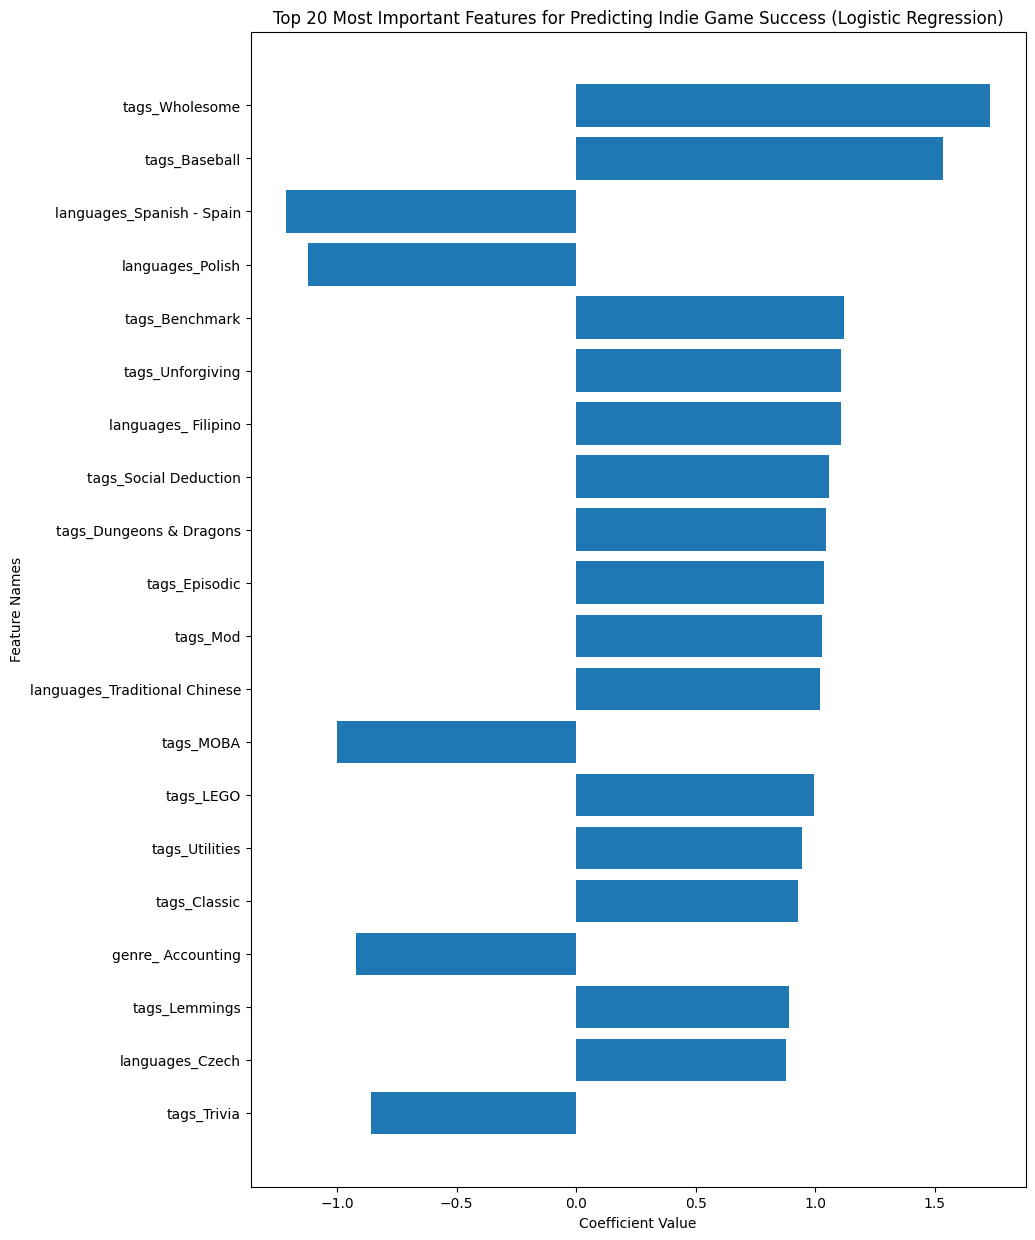

In [27]:
feature_names = X_train_final.columns
coefficients = logreg.coef_[0]

# Pair them up in a tuple and sort by coefficient value
feature_importance = sorted(list(zip(feature_names, coefficients)), key=lambda x: abs(x[1]), reverse=True)
feature_importance_top = feature_importance[:20]

# Separate the tuples for plotting
features, coeffs = zip(*feature_importance_top)

# Plot
plt.figure(figsize=(10, 15))
# Reverse the order for plotting
plt.barh(features[::-1], coeffs[::-1])
plt.title('Top 20 Most Important Features for Predicting Indie Game Success (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Names')
plt.show()

In [28]:
# Prepare the final pipeline and model for saving
# Column transformer(Numerical features- StandardScaler, Categorical features- MultiLabelBinarizer), then XGBoost model
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin

X_train, X_test, y_train, y_test = train_test_split(
    df[['price', 'initialprice', 'genre', 'languages', 'tags']], # Original features
    df['target'],
    test_size=0.2,
    random_state=42,
)

numeric_features = ['price', 'initialprice']
categorical_features = ['genre', 'languages', 'tags']

numeric_preprocessor = Pipeline(
    steps=[("scaler", StandardScaler()),])

class MultiLabelBinarizerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()
    
    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self
    
    def transform(self, X, y=None):
        return self.mlb.transform(X)
    
    def fit_transform(self, X, y=None):
        return self.mlb.fit_transform(X)

preprocessor = ColumnTransformer([
    ('scaler', StandardScaler(), numeric_features),
    ('genre_mlb', MultiLabelBinarizerWrapper(), 'genre'),
    ('languages_mlb', MultiLabelBinarizerWrapper(), 'languages'),
    ('tags_mlb', MultiLabelBinarizerWrapper(), 'tags')
])

pipe = make_pipeline(preprocessor, best_xgb)
pipe.fit(X_train, y_train)


/home/haoli/desktop/coding/steam/steam_success_predictor/venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [17:08:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('xgbclassifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('scaler', ...), ('genre_mlb', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of th

In [29]:
import cloudpickle
f_out = open('model.bin', 'wb') 
cloudpickle.dump(pipe, f_out)
f_out.close()

In [32]:
f_in = open('model.bin', 'rb')
model = cloudpickle.load(f_in)

test_json = {
  "price": 0,
  "initialprice": 1.99,
  "languages": ['English', 'French', 'Dutch'],
  "genre": ['Action', 'Free To Play', 'Indie'],
  "tags": ['FPS', 'Shooter', 'Multiplayer', 'Action', 'Team-Based', 'Tactical', 'First-Person', 'Moddable', 'Indie']
  }

print(model.predict(pd.DataFrame([test_json])))
print(model.predict_proba(pd.DataFrame([test_json])))

f_in.close()

[0]
[[0.51978636 0.48021364]]
